# Exploratory Data Analysis of the Video Games Market

## Business Context
Retro Gamers Ltd. is a proposed business that wants to specialize in retro video gaming consoles and games. They intend to provide hardware and software for gaming consoles that have long gone out of production by their manufacturers, and their customers will be gaming enthusiasts who enjoy "nostalgia gaming". In addition to selling older hardware and games, the company will service older gaming machines, providing repairs and spare parts. A final component of the company's vision is to provide gamers with an online community and marketplace where they can communicate, game together, and buy, borrow, and sell games and gaming consoles.

Retro Gamers Ltd. has commissioned this exploratory data analysis to gain insight into the history and trends in the video gaming business.

### Business Questions
1.	What are the top selling games globally and per region?
2.	What are the top selling consoles and console manufacturers, in terms of units sold and market share?
3.	Which consoles are still supported, and how strong are unit sales for those consoles?
4.	What are the most popular genres, and how has genre popularity changed over time?
5.	How does the portable gaming market differ from home consoles?
6.	How successful are games that are released near the end of the console lifecycle? 
7.	What is the outlook for the video games market?


# Collecting the Data

This analysis uses the "Video Game Sales" dataset from Kaggle. This dataset provides unit sales information on thousands of games, divided by region.
https://www.kaggle.com/datasets/gregorut/videogamesales

In addition, I have supplemented the dataset with information on the platform manufacturer. This information was sourced from the product page of the respective manufacturer or from Wikipedia.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading the dataset

df1 = pd.read_csv("../../datasets/videogames/videogamesales.csv")
print(df1.shape)
df1.head()


(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df1.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The dataset contains information about 16,598 games covering the period from 1980 to 2020.

## Cleaning and Preprocessing the Data

In [4]:
# applying lowercase to column names for better usability
df1.columns = df1.columns.str.lower()

In [5]:
# checking for explicit missing values
print(df1.shape)
print(df1.isnull().sum())

(16598, 11)
rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64


The dataset contains 271 empty values for year, and 58 for publisher. This represents a very small fraction, and so these records can be dropped without negatively impacting the analysis in any significant way.

In [6]:
# dropping missing values
df1 = df1.dropna()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16291 non-null  int64  
 1   name          16291 non-null  object 
 2   platform      16291 non-null  object 
 3   year          16291 non-null  float64
 4   genre         16291 non-null  object 
 5   publisher     16291 non-null  object 
 6   na_sales      16291 non-null  float64
 7   eu_sales      16291 non-null  float64
 8   jp_sales      16291 non-null  float64
 9   other_sales   16291 non-null  float64
 10  global_sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


In [7]:
# checking for duplicate rows
duplicateRows = df1[df1.duplicated()]
print(len(duplicateRows))

0


In [8]:
# checking for implicit missing unit sales figures, that is any game with global_sales of zero or less
print(f"Number of records with zero global sales: ", len(df1[df1["global_sales"] == 0.0]))

# checking for unique values for platform, year_of_release, genre
print(f"\nUnique gaming platforms: ", df1["platform"].unique(),"\ntotal: ", len(df1["platform"].unique()) )
print(f"\nUnique year values: ", df1["year"].sort_values().unique(),"\ntotal: ", len(df1["year"].unique()) )
print(f"\nUnique game genres: ", df1["genre"].unique(),"\ntotal: ", len(df1["genre"].unique()) )


Number of records with zero global sales:  0

Unique gaming platforms:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 
total:  31

Unique year values:  [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.] 
total:  39

Unique game genres:  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] 
total:  12


In [9]:
df1_years = df1["year"].value_counts()
df1_years.sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: year, dtype: int64

No records show global sales of zero.

A total of 31 different gaming consoles are covered by the dataset. Note that I have chosen to include PC as a platform, simply because a number of PC games are listed in the dataset. However, PC differs from the other console manufactures is several key ways. Users can modify their PC hardware and software as they please, and are not limited by the out-of-the-box specifications of a gaming console.

The games are categorized into 12 different gaming genres.

There appear to be no implicit missing values in the data.

The total time period covered by the data is 39 years. However, there are only 3 records for 2017, and 1 for 2020 (compare this to 342 in 2016). This is very likely incomplete data for these years, and as such should be removed.

In [10]:
# removing the 4 records from 2017 and 2020, as data for these years is clearly incomplete.
df1 = df1[(df1["year"] <= 2016)]

In [11]:
# creating a platform map to supplement the data with extra information about platforms, sourced manually from Wikipedia.

platform_map = {
    "Wii": ["Wii", "Nintendo", "home", 2006, 2017],
    "NES": ["Nintendo Entertainment System", "Nintendo", "home", 1983, 1995],
    "GB": ["Game Boy", "Nintendo", "portable", 1989, 2003],
    "DS": ["Nintendo DS", "Nintendo", "portable", 2004, 2022],
    "X360": ["Xbox 360", "Microsoft", "home", 2005, 2016],
    "PS3": ["Playstation 3", "Sony", "home", 2006, 2017],
    "PS2": ["Playstation 2", "Sony", "home", 2000, 2013],
    "SNES": ["Super Nintendo Entertainment System", "Nintendo", "home", 1990, 2003],
    "GBA": ["Game Boy Advance", "Nintendo", "portable", 2001, 2008],
    "3DS": ["Nintendo 3DS", "Nintendo", "portable", 2011, 2020],
    "PS4": ["Playstation 4", "Sony", "home", 2013, 2022],
    "N64": ["Nintendo 64", "Nintendo", "home", 1996, 2002],
    "PS": ["Playstation", "Sony", "home", 1994, 2006],
    "XB": ["Xbox", "Microsoft", "home", 2001, 2009],
    "PC": ["Personal Computer", "PC", "home", 1980, 2050],
    "2600": ["Atari 2600", "Atari", "home", 1977, 1992],
    "PSP": ["Playstation Portable", "Sony", "portable", 2004, 2014],
    "XOne": ["Xbox One", "Microsoft", "home", 2013, 2017],
    "GC": ["GameCube", "Nintendo", "home", 2001, 2007],
    "WiiU": ["Wii U", "Nintendo", "home", 2012, 2017],
    "GEN": ["Sega Genesis", "Sega", "home", 1988, 1999],
    "DC": ["Sega Dreamcast", "Sega", "home", 1998, 2001],
    "PSV": ["Playstation Vita", "Sony", "portable", 2011, 2019],
    "SAT": ["Sega Saturn", "Sega", "home", 1994, 2000],
    "SCD": ["Sega CD", "Sega", "home", 1991, 1996],
    "WS": ["WonderSwan", "Bandai", "portable", 1999, 2003],
    "NG": ["Neo Geo", "SNK Corporation", "home", 1990, 1997],
    "TG16": ["TurboGrafx-16", "NEC", "home", 1987, 1994],
    "3DO": ["3DO Interactive Multiplayer", "Panasonic", "home", 1993, 1996],
    "GG": ["Game Gear", "Sega", "portable", 1990, 1997],
    "PCFX": ["PC-FX", "NEC", "home", 1994, 1998],
}


The platform_map adds the following additional data about gaming consoles:

- platform_fullname (for example, PS3 -> Playstation 3)
- manufacturer (PS3 -> Sony)
- type (console type, home or portable)
- year_from - year when the console appeared on the market.
- year_to - year when the sale of the console was discontinued.

In addition, the following values can be calculated:
- Console lifetime (how long the console was on the market)
- Release point (the point in the console lifetime when a game was released. Zero means the game was released in the same year as the console. One means that the game was released in the year that the console was discontinued.

**Note:** in some cases, consoles are introduced and discontinued in different regions in different years. In such cases, the year represents the first introduction and last discontinuation, regardless of region.

In [12]:
# mapping the platform_map into a new feature called platform_info

df1["platform_info"] = df1["platform"].map(platform_map)

# extracting the list into a new dataframe with separate columns
df1_platform = pd.DataFrame(
    df1["platform_info"].tolist(),
    columns=["platform_fullname", "manufacturer", "type", "year_from", "year_to"],
)

# resetting the index to prepare for concatenation
df1.reset_index(drop=True, inplace=True)
df1_platform.reset_index(drop=True, inplace=True)

# concatenating the original dataset and the df1_platform dataframe
df2 = pd.concat([df1, df1_platform], axis=1)

# dropping the column with the list of platform attributes
df2.drop(["platform_info"], axis=1, inplace=True)

# previewing the new dataframe
df2.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform_fullname,manufacturer,type,year_from,year_to
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii,Nintendo,home,2006,2017
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo Entertainment System,Nintendo,home,1983,1995
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Wii,Nintendo,home,2006,2017
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii,Nintendo,home,2006,2017
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Game Boy,Nintendo,portable,1989,2003


In [13]:
# converting year values from float to integers
df2["year"] = df2["year"].astype(int)
df2["year_from"] = df2["year_from"].astype(int)
df2["year_to"] = df2["year_to"].astype(int)

# adding a new column, 'console_lifetime' - to show how long the console was on the market.
df2["console_lifetime"] = df2["year_to"] - df2["year_from"]

# adding a new column - 'release_point' - to show when a game was released relative to the console's lifetime.
df2["release_point"] = (df2["year"] - df2["year_from"]) / df2[
    "console_lifetime"
]

print(df2.shape)
df2.head()


(16287, 18)


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform_fullname,manufacturer,type,year_from,year_to,console_lifetime,release_point
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii,Nintendo,home,2006,2017,11,0.000000
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo Entertainment System,Nintendo,home,1983,1995,12,0.166667
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Wii,Nintendo,home,2006,2017,11,0.181818
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii,Nintendo,home,2006,2017,11,0.272727
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Game Boy,Nintendo,portable,1989,2003,14,0.500000


In [14]:
df2.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales,year_from,year_to,console_lifetime,release_point
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,8288.969853,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022,2001.186959,2015.827593,14.640634,0.350964
std,4792.138597,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520,7.599767,10.415410,14.106583,0.202361
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1977.000000,1992.000000,3.000000,-1.055556
25%,4131.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,2000.000000,2009.000000,9.000000,0.200000
50%,8291.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,2004.000000,2016.000000,11.000000,0.333333
75%,12437.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,2006.000000,2019.000000,13.000000,0.485714
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000,2013.000000,2050.000000,70.000000,3.333333


In [15]:
# Some games appear to have been released before their console was available. 
# Removing these records, as they are probably errors.
df = df2[df2['release_point'] >= 0]

# Statistical Summary

In [16]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales,year_from,year_to,console_lifetime,release_point
count,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000
mean,8289.066695,2006.406006,0.265662,0.147776,0.078846,0.048444,0.541002,2001.187558,2015.828901,14.641344,0.351136
std,4791.702251,5.826468,0.822602,0.509420,0.311946,0.190127,1.567683,7.600068,10.415774,14.108067,0.201987
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1977.000000,1992.000000,3.000000,0.000000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,2000.000000,2009.000000,9.000000,0.200000
50%,8291.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,2004.000000,2016.000000,11.000000,0.333333
75%,12437.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,2006.000000,2019.000000,13.000000,0.485714
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000,2013.000000,2050.000000,70.000000,3.333333


The table above describes the range, average, percentile values, and standard deviations of the sales data for 16,287 video games.

Across all four regions, the minimum sales figure is zero (min = 0.00), and the minimum value for global sales is 10,000 unites (min = 0.01). However, not only is 0.00 the minimum in each region, but the 25th percentile is also zero. This means that a quarter of all games fail to sell 10,000 units in specific regions, and 25\% of video games globally achieve sales of 60,000 units (25\% = 0.06).

The average global sales performance is around half a million units (mean = 0.540910), which is misleading when you consider that half of the games sold 170,000 or fewer units (50\% = 0.17).

At the opposite end, the maximum global sales for a video game is 82.74 million units. This amounts to over 8,000 times more than the lowest performing game, and over 170 times the figure for the 75th percentile. 

An obvious explanation for this is that the dataset contains a small number of games that are extremely successful, while a very large proportion achieve low to moderate success. A more meaningful measure of central tendency is the median, and the table below presents the middle sales value for each of the regions, as well as console lifetime and release point.

The median amount of time that a console is on the market is 11 years.

The median release point is one third into the lifetime of the console.

In [17]:
df_med = df.drop(["rank", "year", "year_from", "year_to"], axis=1)
print("Median sales by region: ")
df_med.median(numeric_only=True)

Median sales by region: 


na_sales             0.080000
eu_sales             0.020000
jp_sales             0.000000
other_sales          0.010000
global_sales         0.170000
console_lifetime    11.000000
release_point        0.333333
dtype: float64

## Relationships between the features

The pair plot below shows the relationships between unit sales for each region, together with console lifetime and release point.

A clear pattern emerges in the relationships between, most notably global sale and North America sales. This is intuitive - North America is a very large market, and it would be difficult to achieve high global sales with success in North America. This pattern is also visible in Europe, but is less clear when it comes to Japan.

Console lifetime is concentrated in the 0-20 year range, with some apparent extreme values, at around 40 years. This will be explained in later sections.

Release point distribution is concentrated in the 0-1 range, suggesting that the vast majority of games are released during the lifetime of the console, and that it is rare for a game to be released after a console has been discontinued.

The pair plot also presents distribution information along the diagonal - however, the data here is hardly visible. This is due to a small number of extreme values. The next section will elaborate on feature distribution in more detail. 

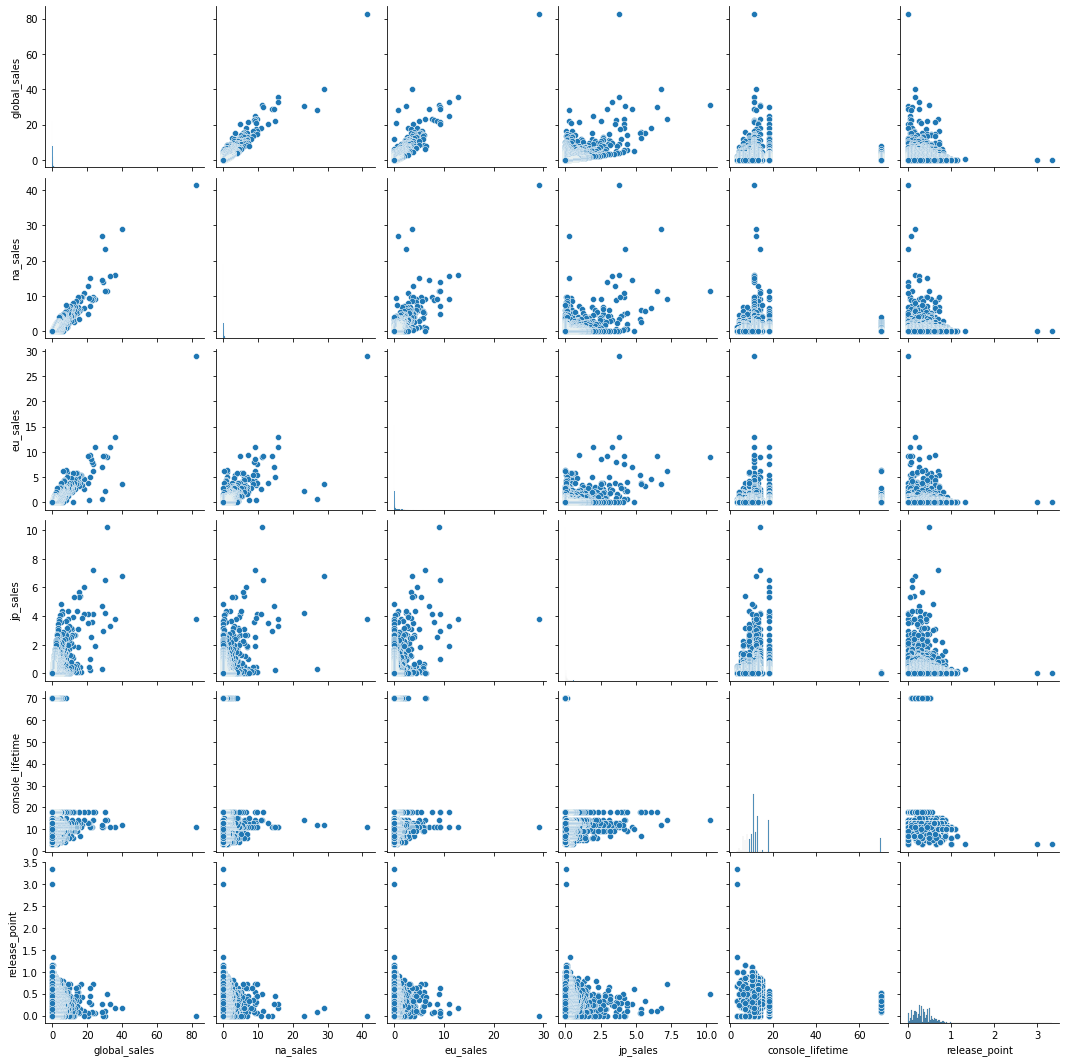

In [18]:
sns.pairplot(
    data=df,
    vars=[
        "global_sales",
        "na_sales",
        "eu_sales",
        "jp_sales",
        "console_lifetime",
        "release_point",
    ],
)

Following on from the information presented in the pair plot, the correlation matrix below shows the correlation coefficients for the same group of features.

Notably, there are moderate to strong positive correlations between all sales-related features. This suggest that, in general, when a game is successful in one region, it tends to succeed in other regions. 

Further, there does not appear to be any strong relationship between the lifetime of a console, the release point of the game, and the success of game. 

<AxesSubplot:>

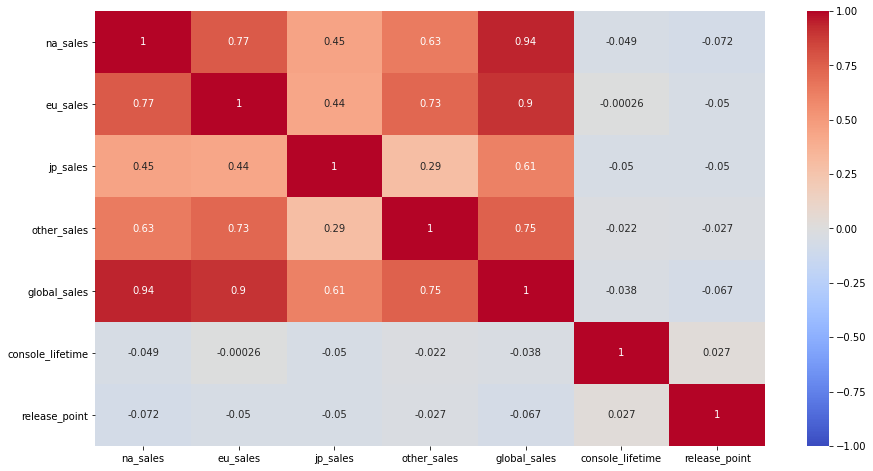

In [19]:
correlations = df.drop(["year", "rank", "year_from", "year_to"], axis=1).corr()

fig, ax1 = plt.subplots(figsize=(15, 8))
sns.heatmap(correlations, cmap="coolwarm", vmin=-1, vmax=+1, annot=True, ax=ax1)

## Distribution of the features
As mentioned above, the data shows that most games achieve low-to-moderate sales numbers (median - 170,000 units), while the top selling game reached over 84 million units.

The boxplot below visualizes this distribution.

On one hand, it might be tempting to consider the high values as anomalous outliers, and remove them. However, they do appear to be valid data points, pointing to an undeniable truth that some games do really, really, really well. And by that, I mean REALLY well.

We can immediately see that the most successful games are for Nintendo, Sony, and Microsoft, with one Nintendo game in particular stealing the show.

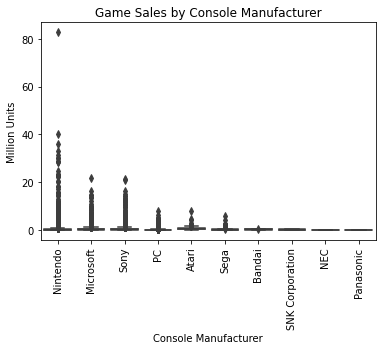

In [20]:
# visualizing the distribution of values, grouped by console manufacturer

ax = sns.boxplot(data=df, x='manufacturer', y='global_sales')
plt.title('Game Sales by Console Manufacturer')
plt.xlabel('Console Manufacturer')
plt.ylabel('Million Units')
plt.setp(ax.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize":(14, 20)})
plt.show()

Below is another visualization of the same data, but with a constraint on the y-axis that gives us a zoomed view. This makes the interquartile ranges visible, where most of the data lies.

Not considering the extreme success of the outliers, it is interesting to note that games for the Atari 2600 show the highest mean values, and the highest interquartile range. Perhaps this speaks to the power of getting to market early - the Atari 2600 was the first mass market home gaming console, and it led the market through the late 1970s and early 1980s. In a time when Atari was the only option, the case may be that any and all games for the Atari 2600 showed decent sales figures because of a lack of market competition.

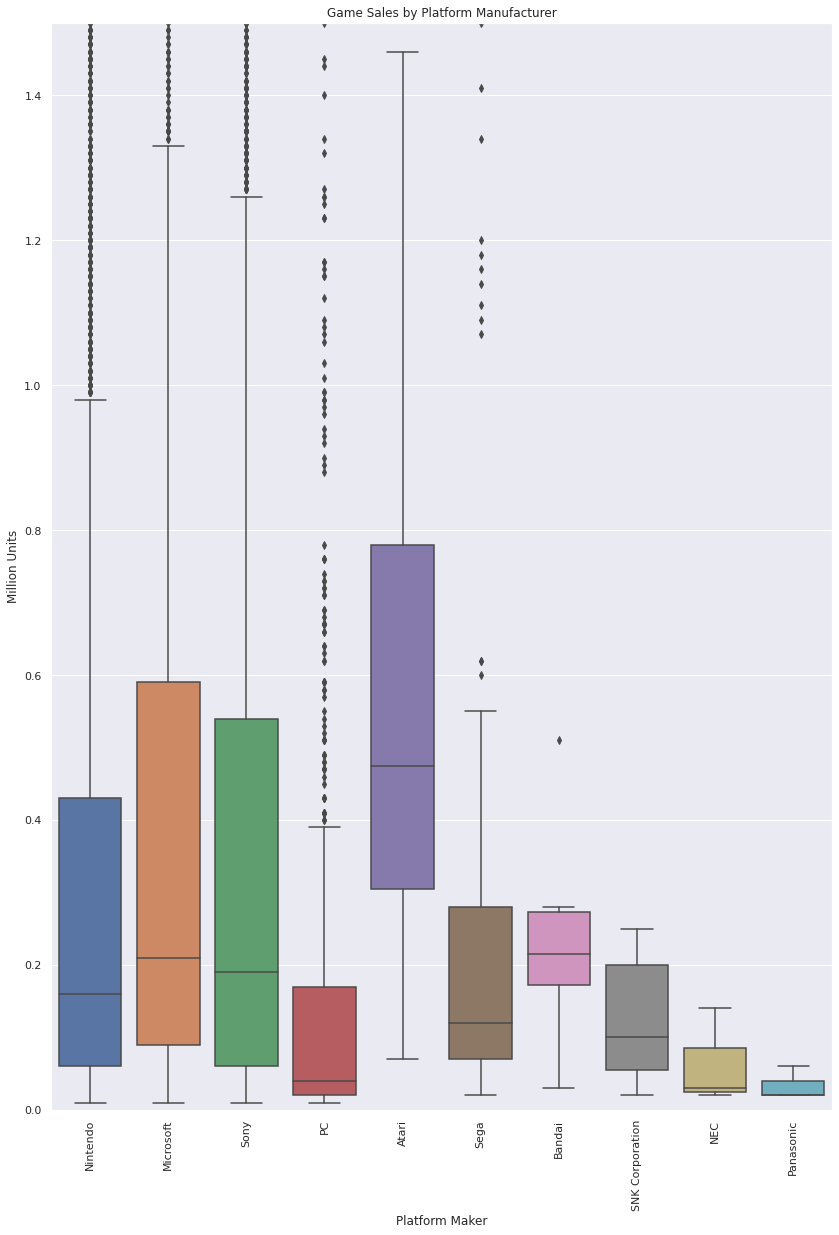

In [21]:
# visualizing the distribution of values, grouped by manufacturer

ax = sns.boxplot(data=df, x='manufacturer', y='global_sales')
plt.title('Game Sales by Platform Manufacturer')
plt.xlabel('Platform Maker')
plt.ylabel('Million Units')
plt.setp(ax.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize":(16, 20)})
plt.ylim(0, 1.5)
plt.show()

# Business Questions

## What are the top selling games globally and per region?
The tables below show the top 10 selling games globally, and in North America, Europe, and Japan.

Wii Sports by Nintendo stands out as the most successful video game, with more than double the unit sales of its nearest rival.

Interestingly, Nintendo is absolutely dominant in terms of global sales - with all of the top ten games having been developed for either the Nintendo Wii, Game Boy, DS or NES system.

In [22]:
# top selling games globally
gb_top_games = df[["name", "manufacturer", "platform", "type", "genre", "global_sales"]]
gb_top_games = gb_top_games.sort_values(["global_sales"], ascending=False)
gb_top_games.head(10)


,name,manufacturer,platform,type,genre,global_sales
0,Wii Sports,Nintendo,Wii,home,Sports,82.74
1,Super Mario Bros.,Nintendo,NES,home,Platform,40.24
2,Mario Kart Wii,Nintendo,Wii,home,Racing,35.82
3,Wii Sports Resort,Nintendo,Wii,home,Sports,33.00
4,Pokemon Red/Pokemon Blue,Nintendo,GB,portable,Role-Playing,31.37
5,Tetris,Nintendo,GB,portable,Puzzle,30.26
6,New Super Mario Bros.,Nintendo,DS,portable,Platform,30.01
7,Wii Play,Nintendo,Wii,home,Misc,29.02
8,New Super Mario Bros. Wii,Nintendo,Wii,home,Platform,28.62
9,Duck Hunt,Nintendo,NES,home,Shooter,28.31


North America shows a result similar to global sales, which is not surprising given the strong correlation between sales in North America and globally. One competitor has managed to squeeze in here - with Microsoft's Kinect Adventures appearing in 7th place, for the Xbox360.

In [23]:
# top selling games in North America
na_top_games = df[["name", "manufacturer", "platform", "type", "genre", "na_sales"]]
na_top_games = na_top_games.sort_values(
    ["na_sales"], ignore_index=True, ascending=False
)
na_top_games.head(10)

,name,manufacturer,platform,type,genre,na_sales
0,Wii Sports,Nintendo,Wii,home,Sports,41.49
1,Super Mario Bros.,Nintendo,NES,home,Platform,29.08
2,Duck Hunt,Nintendo,NES,home,Shooter,26.93
3,Tetris,Nintendo,GB,portable,Puzzle,23.20
4,Mario Kart Wii,Nintendo,Wii,home,Racing,15.85
5,Wii Sports Resort,Nintendo,Wii,home,Sports,15.75
6,Kinect Adventures!,Microsoft,X360,home,Misc,14.97
7,New Super Mario Bros. Wii,Nintendo,Wii,home,Platform,14.59
8,Wii Play,Nintendo,Wii,home,Misc,14.03
9,Super Mario World,Nintendo,SNES,home,Platform,12.78


Meanwhile, in Europe, a similar picture emerges. Nintendo dominates the top 10, with one entry from Sony - GTA V managing to reach 5th place.

In [24]:
# top selling games in Europe
eu_top_games = df[["name", "manufacturer", "platform", "type", "genre", "eu_sales"]]
eu_top_games = eu_top_games.sort_values(
    by="eu_sales", ignore_index=True, ascending=False
)
eu_top_games.head(10)


,name,manufacturer,platform,type,genre,eu_sales
0,Wii Sports,Nintendo,Wii,home,Sports,29.02
1,Mario Kart Wii,Nintendo,Wii,home,Racing,12.88
2,Wii Sports Resort,Nintendo,Wii,home,Sports,11.01
3,Nintendogs,Nintendo,DS,portable,Simulation,11.00
4,Grand Theft Auto V,Sony,PS3,home,Action,9.27
5,Brain Age: Train Your Brain in Minutes a Day,Nintendo,DS,portable,Misc,9.26
6,New Super Mario Bros.,Nintendo,DS,portable,Platform,9.23
7,Wii Play,Nintendo,Wii,home,Misc,9.20
8,Pokemon Red/Pokemon Blue,Nintendo,GB,portable,Role-Playing,8.89
9,Wii Fit Plus,Nintendo,Wii,home,Sports,8.59


In Japan, the picture is similar but different. Again, we see Nintendo being absolutely dominant in terms of the top selling games, but the types of games and consoles seem to show a different pattern.

While portable (i.e. handheld) consoles made up a handful of sales globally and in Europe, and only on entry in North America, a staggering 9 out of 10 of the top selling games in Japan were for portable consoles. Another specificity about the Japanese market may be different preferences for game genre, as we can see that 6 out of the 10 best-selling games are role-playing games.

In [25]:
# top selling games in Japan
jp_top_games = df[["name", "manufacturer", "platform", "type", "genre", "jp_sales"]]
jp_top_games = jp_top_games.sort_values(
    ["jp_sales"], ignore_index=True, ascending=False
)
jp_top_games.head(10)


,name,manufacturer,platform,type,genre,jp_sales
0,Pokemon Red/Pokemon Blue,Nintendo,GB,portable,Role-Playing,10.22
1,Pokemon Gold/Pokemon Silver,Nintendo,GB,portable,Role-Playing,7.20
2,Super Mario Bros.,Nintendo,NES,home,Platform,6.81
3,New Super Mario Bros.,Nintendo,DS,portable,Platform,6.50
4,Pokemon Diamond/Pokemon Pearl,Nintendo,DS,portable,Role-Playing,6.04
5,Pokemon Black/Pokemon White,Nintendo,DS,portable,Role-Playing,5.65
6,Pokemon Ruby/Pokemon Sapphire,Nintendo,GBA,portable,Role-Playing,5.38
7,Animal Crossing: Wild World,Nintendo,DS,portable,Simulation,5.33
8,Brain Age 2: More Training in Minutes a Day,Nintendo,DS,portable,Puzzle,5.32
9,Monster Hunter Freedom 3,Sony,PSP,portable,Role-Playing,4.87


## What are the top selling consoles and console manufacturers, in terms of units sold and market share?
The Sony Playstation 2 is the console with the most game sales (1,233 million), with Microsoft's Xbox in second place, with just under 970 million units sold. Sony has 4 generations of Playstation, plus the Playstation Portable all in the top 10. Surprisingly, Nintendo has only 4 platforms in the top ten.

In [26]:
# Top 10 selling platforms
top_platforms = df[['na_sales','eu_sales','jp_sales','other_sales','global_sales']].groupby(df['platform']).sum()
top_platforms = top_platforms.sort_values('global_sales', ascending=False)
top_platforms.head(31)

,na_sales,eu_sales,jp_sales,other_sales,global_sales
platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.26,194.05,175.00,60.27,818.60
PS,334.71,212.38,139.78,40.69,727.39
GBA,178.38,72.47,46.56,7.51,305.56
PSP,107.09,67.16,75.89,41.52,291.71
PS4,96.80,123.70,14.27,43.36,278.07


In terms of console manufacturer, Sony and Nintendo are close competitors for the top spot. While Nintendo leads the markets in North America and Japan, Sony leads in Europe and the rest of the world. Microsoft is the only other significant console manufacturer in the marketplace. 

Many of the earlier manufacturers have a tiny share of the market, and have not released any consoles for at least the past 20 years, or longer. These include Sega, Atari, Panasonic, and several others.

In [27]:
# Top 10 selling platform_makers
top_platform_makers = df[['na_sales','eu_sales',
                                'jp_sales','other_sales',
                                'global_sales']].groupby(df['manufacturer']).sum()
top_platform_makers = top_platform_makers.sort_values('global_sales', ascending=False)
top_platform_makers['share'] = top_platform_makers['global_sales']/top_platform_makers['global_sales'].sum()
top_platform_makers.head(10)

,na_sales,eu_sales,jp_sales,other_sales,global_sales,share
manufacturer,,,,,,
Sony,1516.49,1092.61,467.53,465.26,3541.56,0.402033
Nintendo,1751.20,780.21,755.00,192.08,3481.56,0.395222
Microsoft,858.84,383.09,14.02,105.03,1361.76,0.154585
PC,92.04,137.35,0.17,24.33,254.70,0.028913
Atari,80.78,4.86,0.00,0.84,86.57,0.009827
Sega,26.42,8.11,43.98,1.28,79.83,0.009062
SNK Corporation,0.00,0.00,1.44,0.00,1.44,0.000163
Bandai,0.00,0.00,1.42,0.00,1.42,0.000161
NEC,0.00,0.00,0.19,0.00,0.19,0.000022


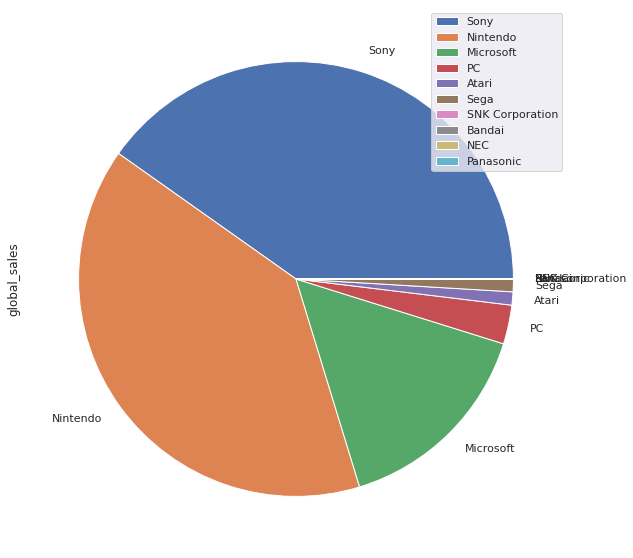

In [28]:
plot = top_platform_makers.plot.pie(y='global_sales', figsize=(10, 10))

## Which consoles are still supported, and how strong are unit sales for those consoles?
Within the time frame of the dataset, the strongest active console on the global market is the Sony Playstation 3.
In North America, the Wii is still the leading console, with the Nintendo DS and the Playstation 3 virtually tied in second place. The PS3 has a strong position in Europe and other regions. 

In Japan, the Nintendo DS is the leading console, and and this provides yet another datapoint that confirms the popularity of portable video gaming in Japan.

In [29]:
# the dataset is up to 2016, so any console with "year_to" after 2016 is considered supported.
active_consoles = df[df['year_to'] > 2016]
active_consoles = active_consoles.drop(["rank", "year", "year_from", "year_to", "console_lifetime", "release_point"], axis=1)
active_consoles = active_consoles.groupby('platform').sum().sort_values("global_sales", ascending=False)
active_consoles

,na_sales,eu_sales,jp_sales,other_sales,global_sales
platform,,,,,
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.26,194.05,175.00,60.27,818.60
PS4,96.80,123.70,14.27,43.36,278.07
PC,92.04,137.35,0.17,24.33,254.70
3DS,78.03,58.29,97.30,12.55,246.27
XOne,83.19,45.65,0.34,11.92,141.06
WiiU,38.32,24.23,12.79,6.45,81.86
PSV,16.07,16.27,20.84,8.41,61.58


## What are the most popular genres, and how has genre popularity changed over time?
The action genre accounts for a fifth of all game sales globally, and is the leading genre in all regions, except for Japan, where it comes second. In Japan, role-playing games are extremely popular, amounting to almost a third of all game sales.

In [30]:
top_genres = df[['na_sales','eu_sales',
                       'jp_sales','other_sales',
                       'global_sales']].groupby(df['genre']).sum()
top_genres = top_genres.sort_values('global_sales', ascending=False)
top_genres["share"] = top_genres['global_sales']/top_platform_makers['global_sales'].sum()
top_genres.head(12)

,na_sales,eu_sales,jp_sales,other_sales,global_sales,share
genre,,,,,,
Action,861.77,516.48,158.62,184.92,1722.81,0.195571
Sports,669.30,371.11,134.76,132.61,1308.19,0.148504
Shooter,575.16,310.45,38.18,101.90,1026.20,0.116493
Role-Playing,326.50,187.57,350.25,59.38,923.79,0.104867
Platform,445.17,200.42,130.30,51.48,827.70,0.093959
Misc,396.92,211.77,106.67,73.92,789.87,0.089665
Racing,356.93,236.31,56.61,76.68,726.76,0.082501
Fighting,220.74,100.00,87.15,36.19,444.05,0.050408
Simulation,181.51,113.02,63.54,31.34,389.69,0.044237


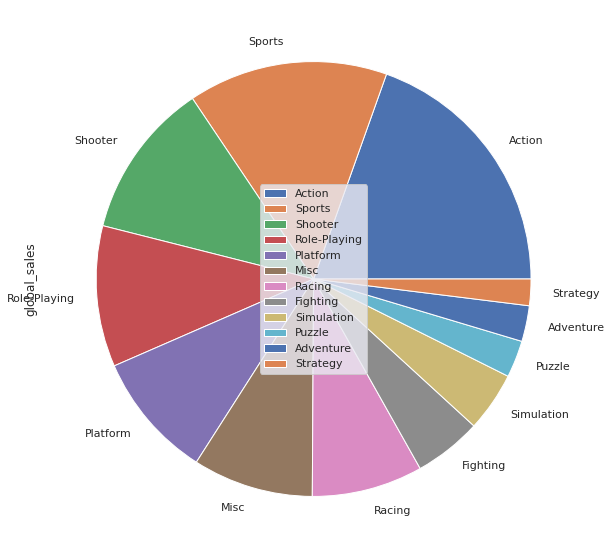

In [31]:
top_genres.plot.pie(y='global_sales', figsize=(10, 10))
plt.legend(loc='center')

The chart below shows the number of games in each genre, from 1980 to 2016.

We can see how genres evolved over time. In the 1980s and early 1990s, platform games were very popular - with game franchises such as Mario Bros. and Sonic the Hedgehog driving game sales. 

Fighting games show strong numbers in the mid to late 1990s. Also in the 1990s, we see the beginning of the rise in role-playing games.

From 2000 until around 2012, 4 major genres begin to dominate the market - action, sports, role-playing games and shooters.

Text(0.5, 0, 'Year of Release')

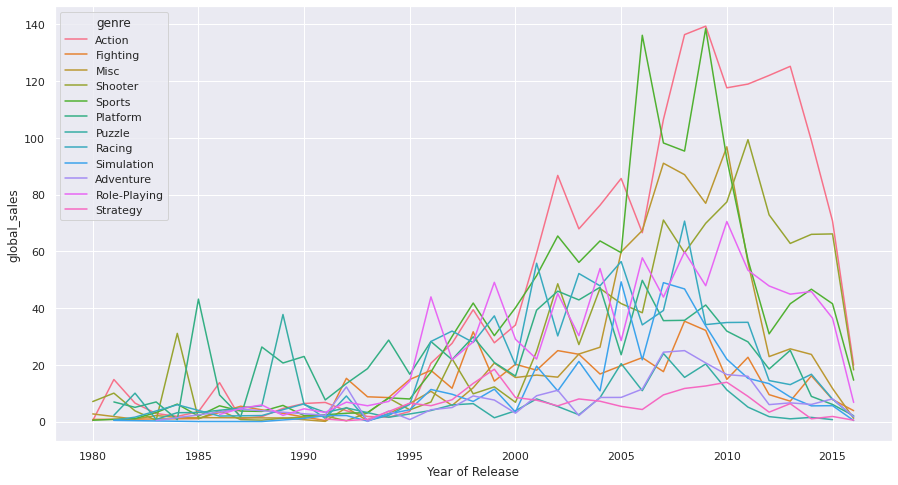

In [32]:
# global sales of games released each year, by genre
gb_sales_by_genre_by_year = df.groupby(['year', 'genre']).sum()

fig, ax1 = plt.subplots(figsize=(15,8))
sns.lineplot(x = "year", y = "global_sales", hue="genre", data = gb_sales_by_genre_by_year, ax=ax1)
plt.xlabel('Year of Release')


## How does the portable gaming market differ from home consoles?

Portable gaming consoles entered the market in the late 1980s, and immediately showed more unit sales than home consoles. This is due to the Nintendo Game Boy - a hugely popular gaming device, that was released in 1989. Clearly the market was thrilled with this device - in its first year, games for Game Boy amounted to a staggering 88% of all games sold, making 1989 the year of the Game Boy.

Through the 1990s, home consoles regained their market dominance. Over the entire timeframe, slightly less than a quarter of all games sold were for portable consoles. From around 2007 onwards, we see a steady decline in portable gaming, which continues right to the end of the time frame.

In [33]:
c_type = df[['na_sales','eu_sales',
                       'jp_sales','other_sales',
                       'global_sales']].groupby(df['type']).sum()
c_type = c_type.sort_values('global_sales', ascending=False)
c_type.head(20)

,na_sales,eu_sales,jp_sales,other_sales,global_sales
type,,,,,
home,3445.12,1950.71,782.03,650.43,6830.96
portable,880.65,455.52,501.82,138.39,1978.17


In [34]:
_1989 = df[(df["year"] == 1989)].groupby(df["platform"]).sum()
_1989 = _1989[["na_sales", "eu_sales", "jp_sales", "other_sales", "global_sales"]]
_1989["share"] = _1989["global_sales"]/_1989["global_sales"].sum()
_1989

,na_sales,eu_sales,jp_sales,other_sales,global_sales,share
platform,,,,,,
2600,0.59,0.03,0.00,0.01,0.62,0.008441
GB,39.81,7.60,16.16,1.40,64.98,0.884683
NES,4.75,0.81,2.20,0.09,7.85,0.106875


<AxesSubplot:ylabel='global_sales'>

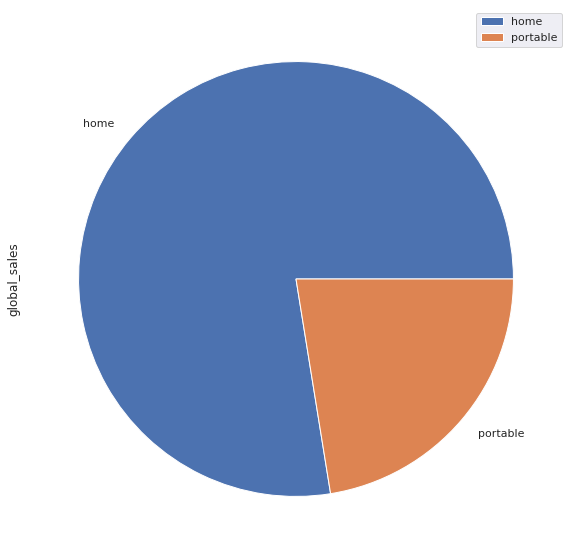

In [35]:
c_type.plot.pie(y='global_sales', figsize=(10, 10))

Text(0.5, 0, 'Year of Release')

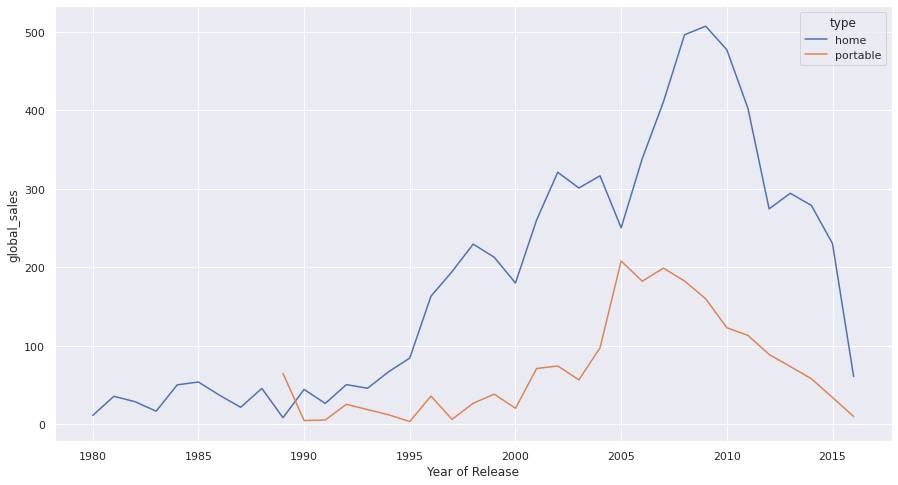

In [36]:
# global sales of games released each year, by genre
gb_sales_by_type_by_year = df.groupby(["year", "type"]).sum()
gb_sales_by_type_by_year

fig, ax1 = plt.subplots(figsize=(15, 8))
sns.lineplot(
    x="year", y="global_sales", hue="type", data=gb_sales_by_type_by_year, ax=ax1
)
plt.xlabel("Year of Release")

## How successful are games that are released near the end of the console lifecycle? 

As shown in the boxplot below, it is not typical for games to be release for a console that is no longer on sale. Games outside the console lifecycle tend to show up as outliers. Games for Nintendo, Sony, and Microsoft devices tend to be released early on in the life of the console - all of these manufacturers have large game releases in the same year as a new console.

Releases of Nintendo games in particular seem to peak early in console lifetime - with three quarters of the total releases coming out before the midway point in the console lifetime. This may point to Nintendo's market strategy - releasing high impact consoles and games, causing disruption in the market - as we saw with the Wii console, and Wii Sports.

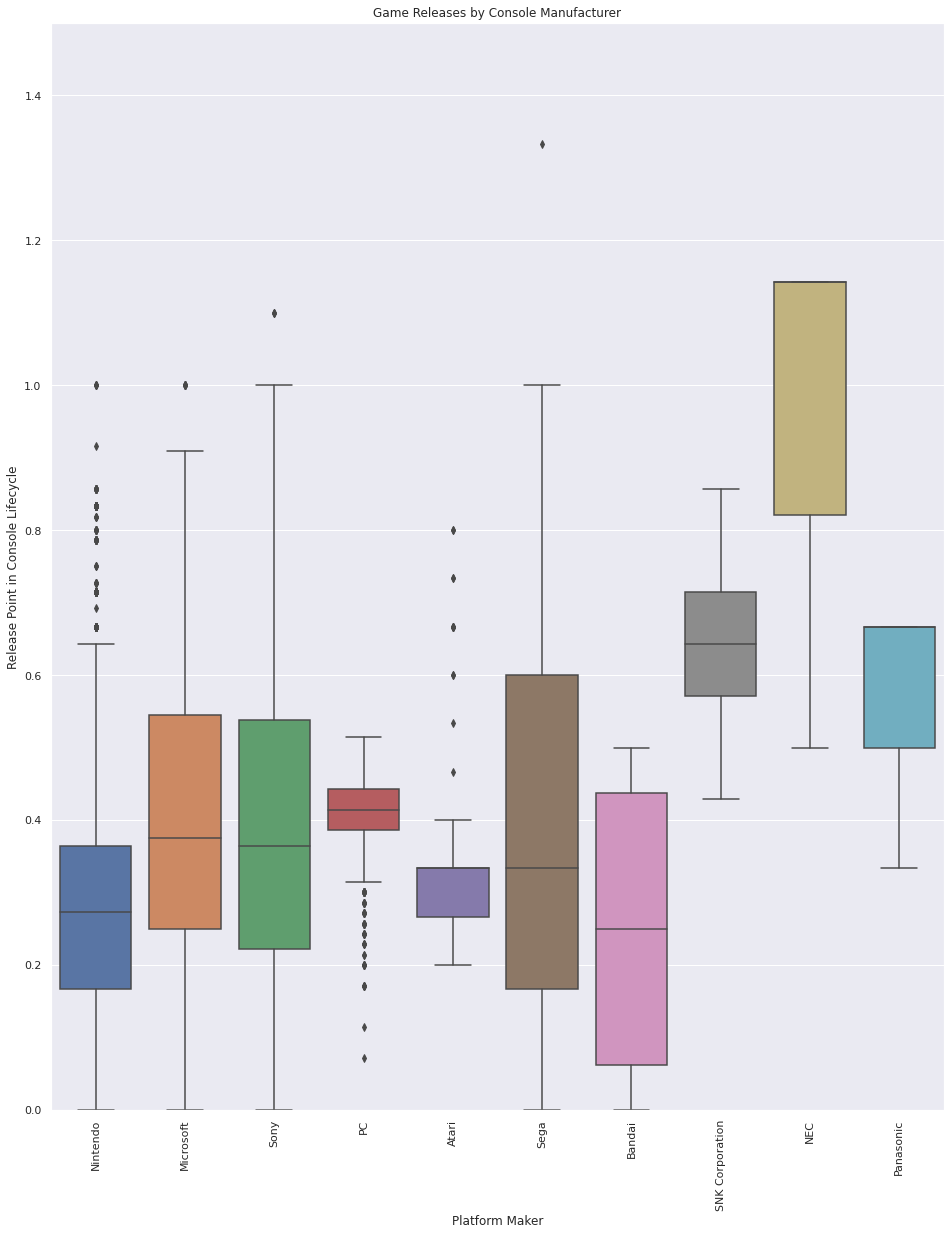

In [37]:
# visualizing the distribution of values, grouped by manufacturer

ax = sns.boxplot(data=df, x='manufacturer', y='release_point')
sns.set(rc={"figure.figsize":(14, 20)})
plt.title('Game Releases by Console Manufacturer')
plt.xlabel('Platform Maker')
plt.ylabel('Release Point in Console Lifecycle')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.ylim(0, 1.5)
plt.show()

The number of games that are released in the last quarter of the console lifetime, or later, is extremely small - it amounts to a mere 1.6% of total units sold.

In [38]:
# How successful are games that are released when a console is mature, or near end of life?
late_games = df[df['release_point'] > 0.75] 
early_games = df[df['release_point'] < 0.75] 

# aggregate total units sold
total_late_games = late_games.sum()
total_early_games = early_games.sum()

late_share = total_late_games.iloc[10]/(total_early_games.iloc[10]+total_late_games.iloc[10])
late_share

0.016573819007345166

## What is the outlook for the video games market?

We see rapid growth in video games unit sales and releases from the mid 90s, continuing until around 2008. Historians may come to call this period a "golden age" for video game sales. From 2009 onwards, we see a steady decline in sales of video games. If this trend continues, the future does not look bright.

From 2008 to 2015, total units sold dropped by 61%. In the same period, the number of games released dropped by 57%.

In [39]:
_2008 = df[df["year"] == 2008]
_2015 = df[df["year"] == 2015]

sales_2008 = _2008.sum()
sales_2015 = _2015.sum()

rel_2008 = _2008.count()
rel_2015 = _2015.count()

prc_change_sal = (sales_2015.iloc[10] / sales_2008.iloc[10]) - 1
prc_change_rel = (rel_2015.iloc[10] / rel_2008.iloc[10]) - 1

print("Change in game sales from 2008 to 2015: ", prc_change_sal)
print("Change in game releases from 2008 to 2015: ", prc_change_rel)


Change in game sales from 2008 to 2015:  -0.6104875533951981
Change in game releases from 2008 to 2015:  -0.5700280112044818


Text(0, 0.5, 'Units Sold')

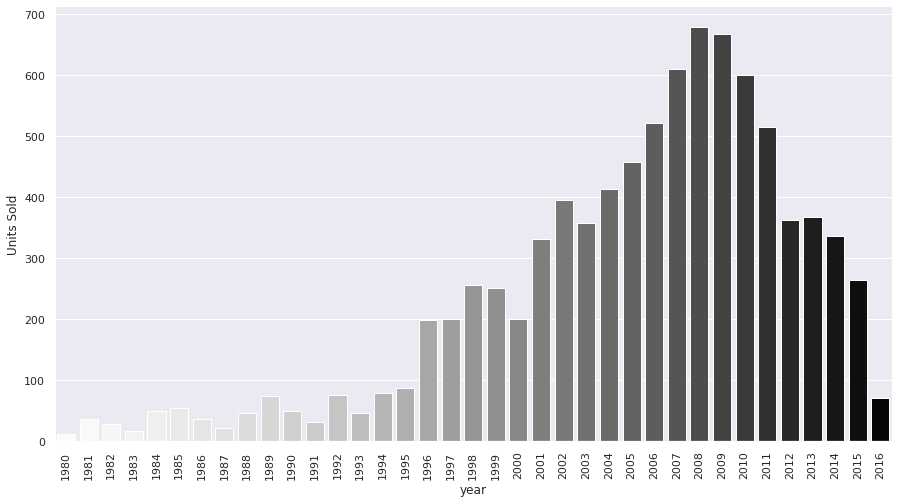

In [40]:
sales_by_year = df.groupby(df["year"]).sum()
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(
    x=sales_by_year.index, y=sales_by_year["global_sales"], palette="Greys", ax=ax1
)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Units Sold")


Text(0, 0.5, 'Games Released')

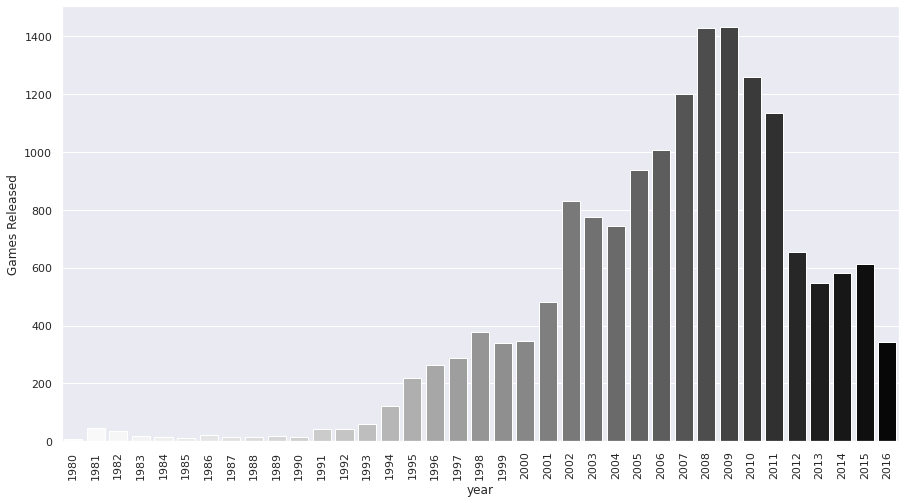

In [41]:
releases_by_year = df.groupby(df["year"]).count()
releases_by_year

fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(
    x=releases_by_year.index, y=releases_by_year["name"], palette="Greys", ax=ax1
)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Games Released")


# Conclusions
This study has attempted to explore the videogames dataset and provide insights into the evolution of the industry over the past 40 years or so.

One conclusion is that most games sell a moderate number of units, but some games are extremely successful.

Another key conclusion is that this is a fast moving industry that is disrupted frequently by innovations. The Atari 2600 was the first, then about a decade later came portable gaming with the Nintendo Game Boy. Another decade or so later came a new level of interactivity, with the Wii. Gaming tastes have also changed significantly, starting with platform and fighting games, to action and sports, with a massive wave of role-playing games sweeping the Japanese market.

For Retro Games Ltd., the takeaways are simple. Quite literally, billions of units of games are out there, and millions of consoles. A result of the fast-paced innovation in the industry is that devices and content become obsolete quickly, and rarely are new games released for old machines. A business model that relies on sourcing devices, parts, and games would need to focus on connecting the demand with the supply. Additional market research could explore the generational factors, and help a company such as Retro Games target the right demographics with the devices and games of their youth.

However, that likely remains a niche market. Overall, it seems quite clear from the data that the video gaming market, as we have traditionally known it as a space of consoles and cartridges is in decline. 

## Recommendations for further research
The industry has seen disruptive innovations that are not captured in this dataset, but that may have a significant effect on the data. It would be interesting to incorporate data about, for example, smartphones (Android and iPhone as gaming devices), virtual reality gaming, subscription gaming (e.g. Fortnite), and hybrid home/portable devices (e.g. Nintendo Switch) and see how the nature of the industry is changing. 

- What effect did the rising popularity of smartphones in the mid 2000s have on video gaming? 
- How have portable and home consoles competed with the smartphone revolution?
- How has the landscape changed - what are the new hardware and software producers - given the strength of Google Android and Apple in the mobile communications market.
- How have innovations, such as cameras, GPS trackers, gyroscopes and other technology changed the way we interact with video games?
- How has new technology, such as augmented reality, enabled old franchises to find new applications? One significant example is the Pokemon GO smartphone/gps game that took the world by storm in 2016?
